# Important: this must be tested in the (almost) infinite scenario with sigma=0.0 to avoid bias from coalescence

In [1]:
import csv

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import expon, kstest

In [3]:
speciations = []

with open("/workspace/necsim-rust/speciation.csv") as file:
    reader = csv.reader(file)
    
    next(reader)
    
    for row in reader:
        speciations.append(float(row[0]))

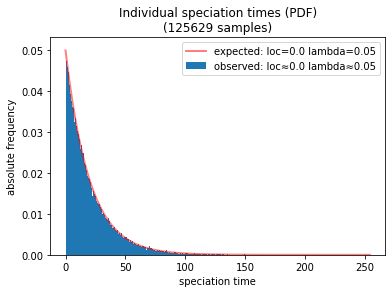

In [4]:
plt.title(f"Individual speciation times (PDF)\n({len(speciations)} samples)")
plt.xlabel("speciation time")
plt.ylabel("absolute frequency")

xmin = np.min(speciations)
xmax = np.max(speciations)

x = np.linspace(xmin, xmax, 1000)
p = expon.pdf(x, 0.0, 20.0)

plt.plot(x, p, color='red', linewidth=2, alpha=0.5, label=f"expected: loc=0.0 lambda=0.05")

loc, scale = expon.fit(speciations)

plt.hist(speciations, bins = 1000, density=True, label=f"observed: loc≈{round(loc, 3)} lambda≈{round(1.0/scale, 3)}")

plt.legend()
plt.show()

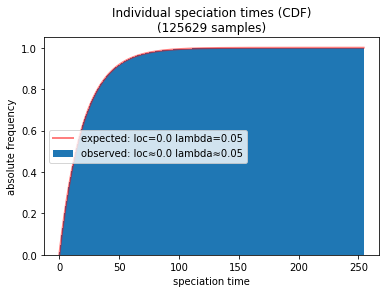

In [5]:
plt.title(f"Individual speciation times (CDF)\n({len(speciations)} samples)")
plt.xlabel("speciation time")
plt.ylabel("absolute frequency")

xmin = np.min(speciations)
xmax = np.max(speciations)

x = np.linspace(xmin, xmax, 1000)
p = expon.cdf(x, 0.0, 20.0)

plt.plot(x, p, color='red', linewidth=2, alpha=0.5, label=f"expected: loc=0.0 lambda=0.05")

loc, scale = expon.fit(speciations)

plt.hist(speciations, bins = 1000, density=True, cumulative=True, label=f"observed: loc≈{round(loc, 3)} lambda≈{round(1.0/scale, 3)}")

plt.legend()
plt.show()

In [6]:
kstest(speciations, expon(loc=0.0, scale=20.0).cdf)

KstestResult(statistic=0.0018028063718262821, pvalue=0.8081397845261189)

In [7]:
0/0

ZeroDivisionError: division by zero

In [ ]:
np.mean(speciations)

In [ ]:
test = []

np.random.seed(42)

for _ in range(1000000):
    time = 0.0

    while True:
        time += np.random.exponential(scale=2.0)
        
        if np.random.random_sample() < 0.1:
            test.append(time)
            break

In [ ]:
plt.hist(test, bins=1000, density=True)
plt.show()

In [ ]:
kstest(test, expon(loc=0.0, scale=20.0).cdf)

In [ ]:
speciations[45000:46000]